In [1]:
import kagglehub
import os 
import pandas as pd
import numpy as np

# Download latest version
path = kagglehub.dataset_download("adilshamim8/economic-indicators-and-inflation")

# read data
df = pd.read_csv(os.path.join(path, "Economic Indicators And Inflation.csv"))
df.head()

c:\Users\EricKaufmann\workspace\datainsights\economic-values\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,Country,Year,GDP (in billion USD),Inflation Rate (%),Unemployment Rate (%),Economic Growth (%)
0,USA,2010,15000.0,1.64,9.63,2.55
1,USA,2011,15500.0,3.16,8.94,1.53
2,USA,2012,16000.0,2.07,8.10,2.28
3,USA,2013,16500.0,1.50,7.70,1.84
4,USA,2014,17000.0,1.62,7.25,2.53


In [2]:
df.columns

Index(['Country', ' Year', ' GDP (in billion USD)', ' Inflation Rate (%)',
       ' Unemployment Rate (%)', ' Economic Growth (%)'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 304 non-null    object 
 1    Year                   304 non-null    int64  
 2    GDP (in billion USD)   304 non-null    float64
 3    Inflation Rate (%)     304 non-null    float64
 4    Unemployment Rate (%)  304 non-null    float64
 5    Economic Growth (%)    304 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 14.4+ KB


In [4]:
df["Country"].unique()

array(['USA', 'China', 'Japan', 'Germany', 'India', 'UK', 'Canada',
       'Russia', 'Australia', 'France', 'South Korea', 'Saudi Arabia',
       'Brazil', 'Italy', 'Bangladesh', 'Indonesia', 'Turkey', 'Malaysia',
       'Pakistan'], dtype=object)

In [5]:
df[" Year"].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023, 2024, 2025])

## Data Cleaning

In [6]:
df.columns

Index(['Country', ' Year', ' GDP (in billion USD)', ' Inflation Rate (%)',
       ' Unemployment Rate (%)', ' Economic Growth (%)'],
      dtype='object')

In [7]:
# rename columns
df.rename(columns={
    " Year": "Year",
    " GDP (in billion USD)": "GDP (in billion USD)",
    " Inflation Rate (%)": "Inflation Rate (%)",
    " Unemployment Rate (%)": "Unemployment Rate (%)",
    " Economic Growth (%)": "Economic Growth (%)"
}, inplace=True)
df.head()

,Country,Year,GDP (in billion USD),Inflation Rate (%),Unemployment Rate (%),Economic Growth (%)
0,USA,2010,15000.0,1.64,9.63,2.55
1,USA,2011,15500.0,3.16,8.94,1.53
2,USA,2012,16000.0,2.07,8.10,2.28
3,USA,2013,16500.0,1.50,7.70,1.84
4,USA,2014,17000.0,1.62,7.25,2.53


## Analysis

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

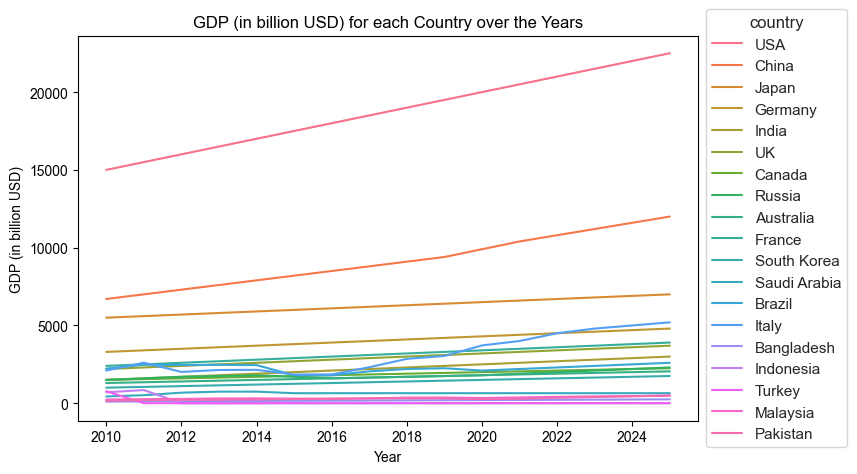

In [9]:
# How has the GDP (in billion USD) changed for each country over the years?

fig, ax = plt.subplots(figsize=(10, 5))

sns.set_theme(style="whitegrid", palette="pastel")

sns.lineplot(data=df, x="Year", y="GDP (in billion USD)", hue="Country")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

ax.legend(title="country", loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("GDP (in billion USD) for each Country over the Years")
plt.show()

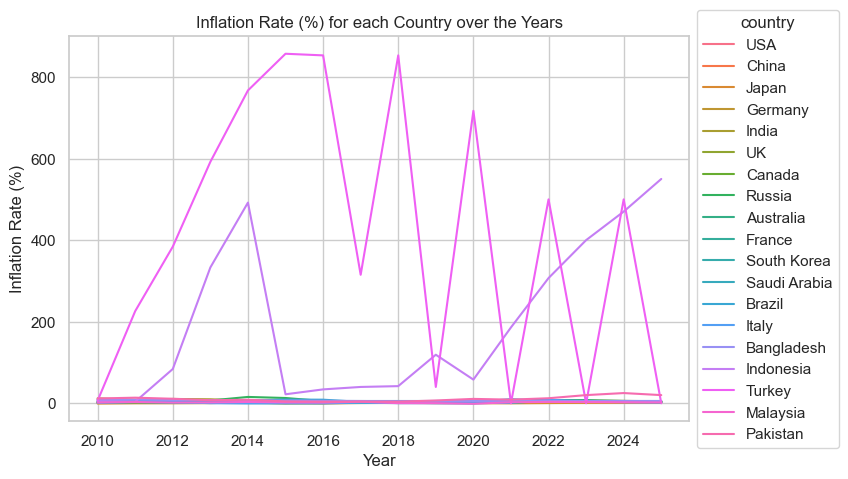

In [10]:
# How has the Inflation Rate (%) changed for each country over the years?

fig, ax = plt.subplots(figsize=(10, 5))

sns.set_theme(style="whitegrid", palette="pastel")

sns.lineplot(data=df, x="Year", y="Inflation Rate (%)", hue="Country")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

ax.legend(title="country", loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Inflation Rate (%) for each Country over the Years")
plt.show()

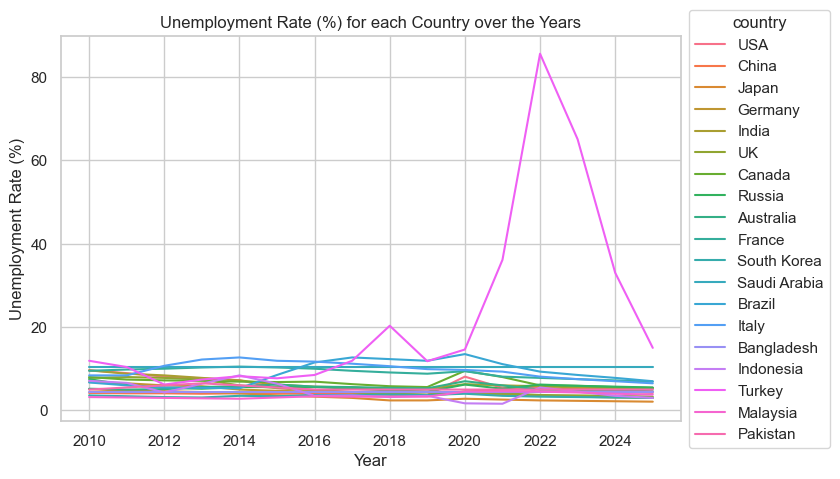

In [11]:
# How has the Unenployment Rate (%) changed for each country over the years?

fig, ax = plt.subplots(figsize=(10, 5))

sns.set_theme(style="whitegrid", palette="pastel")

sns.lineplot(data=df, x="Year", y="Unemployment Rate (%)", hue="Country")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

ax.legend(title="country", loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Unemployment Rate (%) for each Country over the Years")
plt.show()

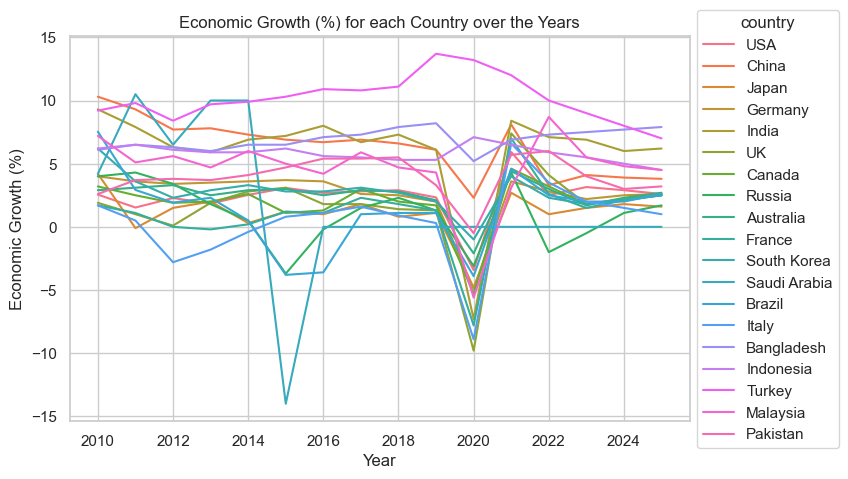

In [12]:
# How has the Economic Groth (%) changed for each country over the years?

fig, ax = plt.subplots(figsize=(10, 5))

sns.set_theme(style="whitegrid", palette="pastel")

sns.lineplot(data=df, x="Year", y="Economic Growth (%)", hue="Country")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

ax.legend(title="country", loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Economic Growth (%) for each Country over the Years")
plt.show()

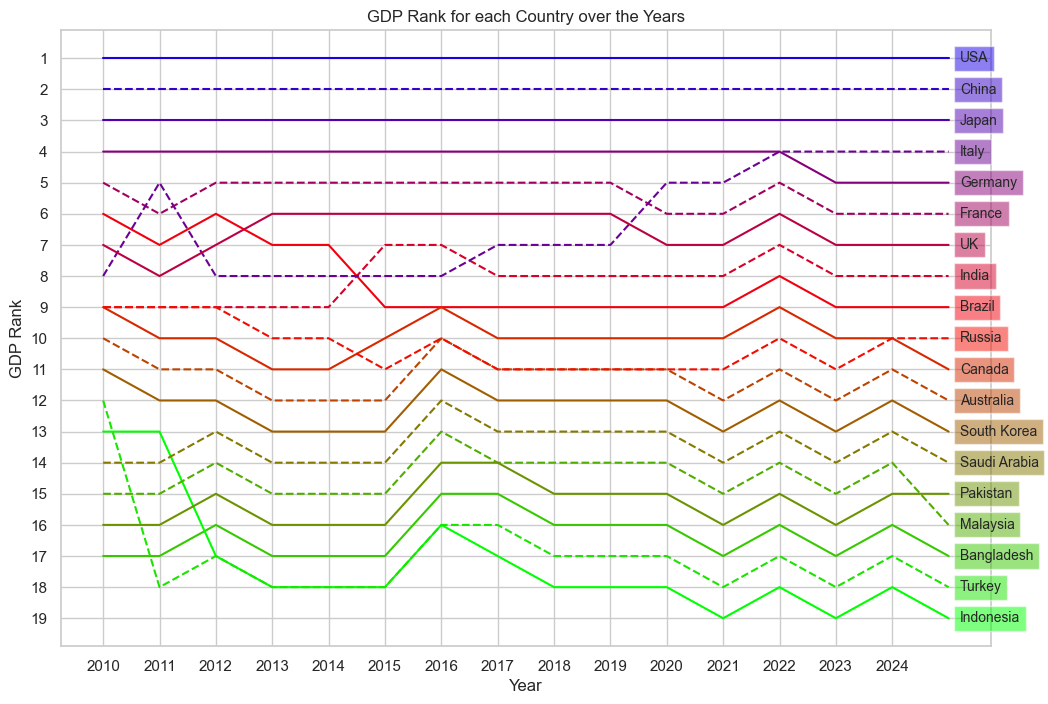

In [ ]:
# How does the GDP (in billion USD) of each country rank over the years?

df["GDP Rank"] = df.groupby("Year")["GDP (in billion USD)"].rank(method="dense", ascending=False)

fig, ax = plt.subplots(figsize=(12, 8))

blues_cmap = plt.get_cmap('brg', 20)

last_year_rank_df = df.loc[(df["Year"] == 2025), ["Country", "GDP Rank"]]\
                        .sort_values("GDP Rank")\
                        .reset_index(drop=True)

for (c), group in df.groupby("Country"):
    last_rank = last_year_rank_df.loc[(last_year_rank_df["Country"] == c, "GDP Rank")].values[0]
    dashline = '-' if last_rank % 2 == 1 else '--'
    color = blues_cmap(last_rank / 20.0)
    ax.plot(group["Year"], group["GDP Rank"], dashline, label=c, color=color)
    
    plt.text(2025 + 0.2, last_rank, c, fontsize=10, verticalalignment="center", bbox=dict(facecolor=color, alpha=0.5))

ax.set_yticks(np.arange(1, 20, 1))
ax.invert_yaxis()
ax.set_ylabel("GDP Rank")

ax.set_xticks(np.arange(df["Year"].min(), df["Year"].max(), 1))
ax.set_xlabel("Year")

plt.title("GDP Rank for each Country over the Years")

plt.show()